### About the Data
The data consists of the following columns:
- `SortType` - The algorithm used to sort the data (bubble sort, selection sort, insertion sort).
- `ArrayType` - The order the integers in the array prior to sorting.
    - `Random` - The integers in the array were in random order.
    - `Increasing` - The integers in the array were in ascending order.
    - `IncreasingAndRandom` - 90% of the integers were in ascending order while 10% were in random order.
    - `Decreasing` - The integers in the array were in descending order.
    - `Equal` - The integers in the array were all the same.
- `ArraySize` - The size of the array.
    - `10000` - The array contained 10,000 integers.
    - `25000` - The array contained 25,000 integers.
    - `50000` - The array contained 50,000 integers.
    - `100000` - The array contained 100,000 integers.
- `Test`# - The time it took in milliseconds to sort the array.
- `AverageTime` - The average of all the test times in milliseconds.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

Increase the display size of all graphs by `factor`.

In [2]:
factor = 1.2
mpl.rcParams["figure.dpi"] = mpl.rcParamsDefault["figure.dpi"] * factor

Set the color style for all displayed graphs. Run `plt.style.available` for a list of styles.

In [3]:
# plt.style.use(["dark_background"])

### Data
The data is the same as the data from the [sorting algorithms analysis](https://github.com/irisfield/sorting-algorithms-analysis) project.

In [4]:
tests = pd.read_csv("data/sort_tests.csv")

In [5]:
tests

,SortType,ArrayType,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime
0,BubbleSort,Equal,10000,2.100887,1.816844,1.734940,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819
1,BubbleSort,Equal,25000,0.344438,0.342302,0.340168,0.341084,0.273704,0.343259,0.340629,0.346424,0.286490,0.328722
2,BubbleSort,Equal,50000,0.669300,0.714362,0.750050,0.751582,0.724130,0.845181,0.480185,0.509878,0.512997,0.661962
3,BubbleSort,Equal,100000,0.983173,0.811248,0.910891,0.922530,0.944618,0.962387,0.922943,1.047562,0.937066,0.938046
4,BubbleSort,Random,10000,1423.721529,1615.646777,1636.998131,1733.617812,1699.408568,1608.589898,1640.827512,1584.911188,1805.414216,1638.792847
5,BubbleSort,Random,25000,17820.525435,14897.161279,14086.136214,12153.546143,13017.104881,16598.033997,16510.642676,15338.869148,17002.808605,15269.425375
6,BubbleSort,Random,50000,92502.936111,72313.872971,60330.164272,66429.312906,66336.374407,62790.397230,67761.572618,66051.570752,63835.811092,68705.779151
7,BubbleSort,Random,100000,267902.873662,330858.314055,351393.330513,356742.938208,381057.021634,385180.364030,374069.504284,344426.077008,371334.521629,351440.549447
8,BubbleSort,Increasing,10000,0.120689,0.142236,0.168250,0.139213,0.133302,0.125839,0.138850,0.139291,0.142248,0.138879
9,BubbleSort,Increasing,25000,0.352865,0.260573,0.353962,0.307230,0.354571,0.339063,0.341304,0.345099,0.384553,0.337691


### Classification Models
**Terminology**
- The *dependent variable* is the variable being predicted or classified.
- The *features* (or the *independent variables*) are the known variables used to predict or classify the dependent variable.
- The *confusion matrix* is an evaluation metric used to determine accuracy, sensitivity, and specificity of the model.

**Dependent Variable**
- The variable being classified for this project is the `SortType` column. Specifically, bubble sort and selection sort.
- The dependent variable will be represented by the variable `y`.

**Independent Variables**
- Other than the `SortType` column, all the remaining columns may be used as features. 
- It may be neccesary to convert qualitative data, such as the `ArrayType` columns into dummy variable before they can used as features.
- The independent variables will be presented by variable `x`.

**Algorithms**
- The classification algorithms covered in class are:
    - Decision Tree
    - Random Forest Classifiers
    - k-Nearest Neighbors for Classification

-------------------------------------------------------------------------

### Preparations

#### Drop
Since the test time columns make up most of the data, the models will mostly use the test times to classify the data, hence  drop all the test times columns.

In [6]:
print(*tests.columns, sep = ", ")

SortType, ArrayType, ArraySize, Test1, Test2, Test3, Test4, Test5, Test6, Test7, Test8, Test9, AverageTime


In [7]:
tests = tests.drop(columns = ["Test2", "Test3", "Test4", "Test5", "Test6", "Test8", "Test9"])
tests[:0]

,SortType,ArrayType,ArraySize,Test1,Test7,AverageTime


##### Dummy Variables
Convert qualitative columns into numerical columns.

In [8]:
tests = pd.get_dummies(tests, columns = ["ArrayType"], drop_first = True)

Display the DataFrame and make sure the dummy variables are correct. The `drop_first = True` parameter drops the first dummy variable. The dropped column is implied because if all the dummy variables for a row are zeros, then it could only be the dropped column.

In [9]:
tests[:0]

,SortType,ArraySize,Test1,Test7,AverageTime,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random


#### Filter
Since bubble and insertion sort performed similarly in the [analysis](https://sites.google.com/view/irisfield-sorting-algorithms), group them together.
- Group 0: Bubble and Insertion Sort
- Group 1: Selection Sort

In [10]:
cluster_map = {"BubbleSort": 0, "InsertionSort": 0, "SelectionSort": 1}
tests["SortType"] = tests["SortType"].apply(str).map(cluster_map)

In [11]:
tests.dtypes[:1]

SortType    int64
dtype: object

In [12]:
tests[38:42]

,SortType,ArraySize,Test1,Test7,AverageTime,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random
38,0,50000,1025.778919,520.689934,528.033835,0,0,1,0
39,0,100000,204.300309,1106.007188,2783.414470,0,0,1,0
40,1,10000,173.075217,131.756129,131.335799,1,0,0,0
41,1,25000,842.236610,837.758452,822.699091,1,0,0,0


#### Data
- Store the independent variables or features as a data frame inside the variable `x`.
- Store the dependent variable as a series inside the variable `y`.

In [13]:
x = tests.drop(columns = ["SortType"])
y = tests["SortType"]

Make sure the data frame `x` does not contain the `SortType` column and that series `y` only contains the `SortType` column.

In [14]:
x[38:42]

,ArraySize,Test1,Test7,AverageTime,ArrayType_Equal,ArrayType_Increasing,ArrayType_IncreasingAndRandom,ArrayType_Random
38,50000,1025.778919,520.689934,528.033835,0,0,1,0
39,100000,204.300309,1106.007188,2783.414470,0,0,1,0
40,10000,173.075217,131.756129,131.335799,1,0,0,0
41,25000,842.236610,837.758452,822.699091,1,0,0,0


In [15]:
y[38:42]

38    0
39    0
40    1
41    1
Name: SortType, dtype: int64

#### Data Split
Split the data into training and testing datasets. As per convention, split into 70% training and 30% testing.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

Make sure the data was split correctly.
- `x_train` and `y_train` should have the same indexes.
- `x_test` and `y_test` should have the same indexes.

In [17]:
# returns true if if all the indices match 1:1
print(x_train.index.to_list() == y_train.index.to_list())
print(x_test.index.to_list() == y_test.index.to_list())

True
True


-------------------------------------------------------------------------

### Definition
This function definition facilitates comparing two mean squared errors by computing their percent difference.

In [18]:
def show_matrix(cmatrix):
    ax = plt.gca()
    # Use Pastel2_r for pastel color soutside of diagonal line.
    ax.imshow(cmatrix, cmap = "Pastel2") # https://www.pythonpool.com/matplotlib-cmap/
    ax.xaxis.set(ticks = range(2), ticklabels = ("0", "1"))
    ax.yaxis.set(ticks = range(2), ticklabels = ("0", "1"))
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cmatrix[i, j], ha = "center", va = "center", color = "black")
    plt.xlabel("Predictions")
    plt.ylabel("Observations")

In [19]:
def evaluation_metrics(confusion_matrix):
    true_neg = confusion_matrix[0][0]
    true_pos = confusion_matrix[1][1]
    false_neg = confusion_matrix[1][0]
    false_pos= confusion_matrix[0][1]
    accuracy = (true_neg + true_pos) / (true_neg + true_pos + false_neg + false_pos)
    precision = true_pos / (true_pos + false_pos)
    sensitivity = true_pos / (true_pos + false_neg)
    specificity = true_neg / (true_neg + false_pos)
    print("   Accuracy = {:0.2f}%".format(accuracy * 100))
    print("  Precision = {:0.2f}%".format(precision * 100))
    print("Sensitivity = {:.2f}%".format(sensitivity * 100))
    print("Specificity = {:.2f}%".format(specificity * 100))

### Metric
The confusion matrices are evaluated by comparing the accuracy, precision, sensitivity, and specificity for each model.
- Accuracy refers to the frequency of correct predictions. The ratio of the true cases to all the cases.
- Precision refers to the frequency of positive events that turned out to be true (positive).
- Sensitivity refers to the ratio of correct positive events to total positive events.
- Specificity refers to the ratio of correct negative events to total negative events.

For our data, this means the following: 
- If the *observations* and *predictions* are both zero, the model correctly classified a bubble sort as a bubble sort (or true negative).
- If the *observations* is zero and the *predictions* is one, the model incorrectly classified a bubble sort as a selection sort (or false positive).
- If the *observations* is one and the *predictions* is zero, the model incorrectly classified a selection sort as a bubble sort (or false negative).
- If the *observations* and *predictions* are both one, the model correctly classified a selection sort as a selection sort (or true positive).

-------------------------------------------------------------------------

### Decision Tree

#### Parameter Search
Use a for-loop to search for the best `max_depth` for the tree using based on the confusion matrix and evaluation metrics.

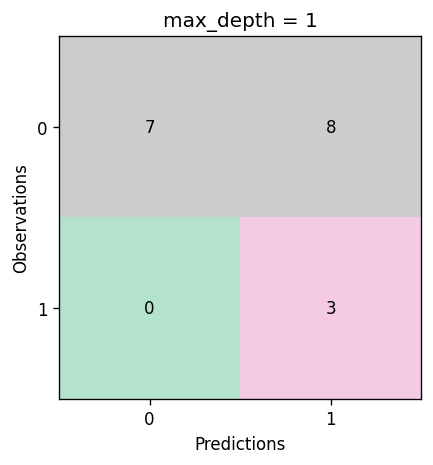

   Accuracy = 55.56%
  Precision = 27.27%
Sensitivity = 100.00%
Specificity = 46.67%


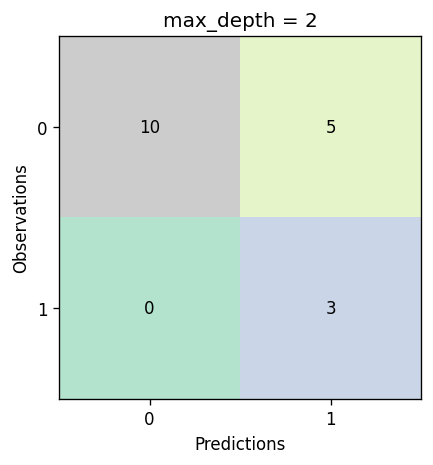

   Accuracy = 72.22%
  Precision = 37.50%
Sensitivity = 100.00%
Specificity = 66.67%


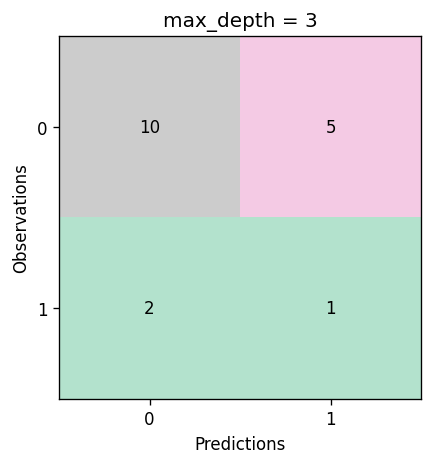

   Accuracy = 61.11%
  Precision = 16.67%
Sensitivity = 33.33%
Specificity = 66.67%


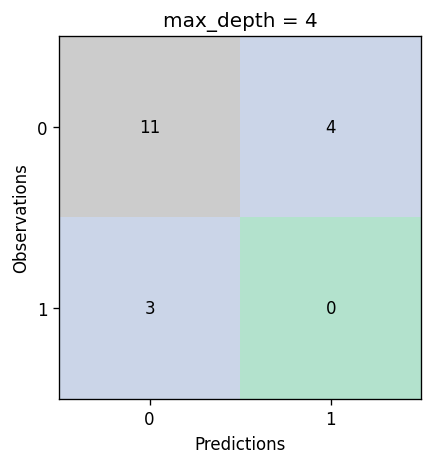

   Accuracy = 61.11%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 73.33%


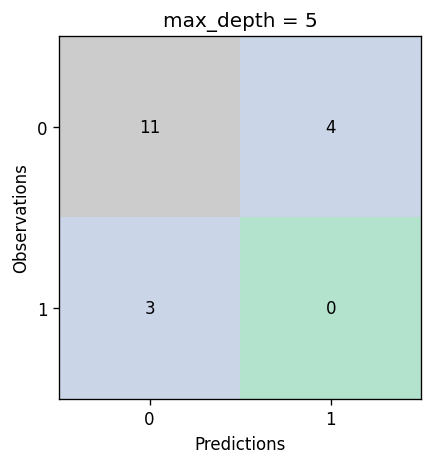

   Accuracy = 61.11%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 73.33%


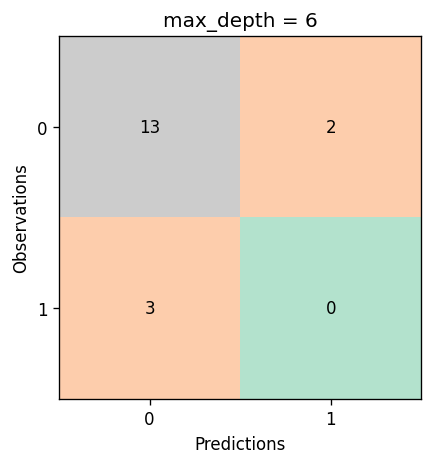

   Accuracy = 72.22%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 86.67%


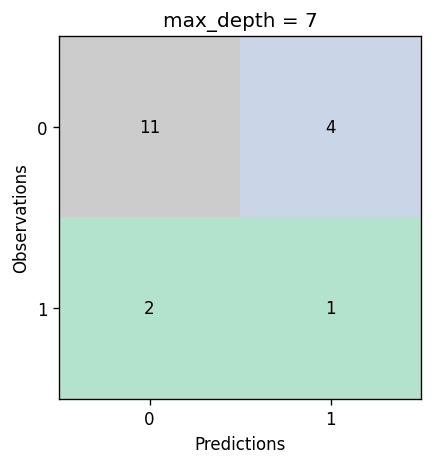

   Accuracy = 66.67%
  Precision = 20.00%
Sensitivity = 33.33%
Specificity = 73.33%


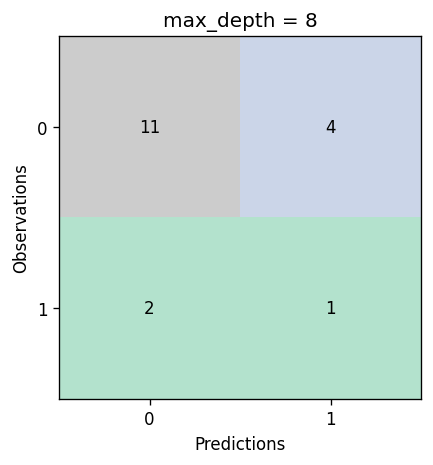

   Accuracy = 66.67%
  Precision = 20.00%
Sensitivity = 33.33%
Specificity = 73.33%


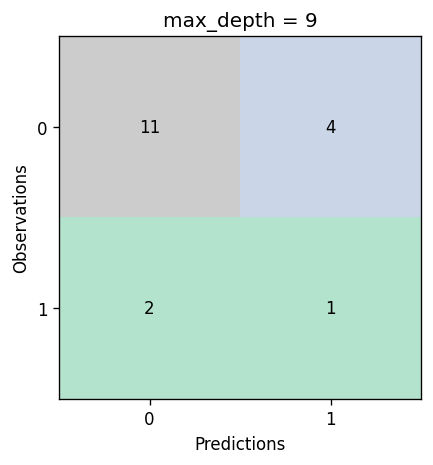

   Accuracy = 66.67%
  Precision = 20.00%
Sensitivity = 33.33%
Specificity = 73.33%


In [20]:
for d in range (1, 10):
    dtree = DecisionTreeClassifier(max_depth = d).fit(x_train, y_train)
    y_test_preds = dtree.predict(x_test)
    cmatrix_dtree = confusion_matrix(y_test, y_test_preds)
    show_matrix(cmatrix_dtree)
    plt.title("max_depth = {}".format(d))
    plt.show()
    evaluation_metrics(cmatrix_dtree)

### Best Depth
Based on the search results, use the best `max_depth` to create a tree model.

In [21]:
dtree_best = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train)
y_test_preds_best = dtree_best.predict(x_test)
cmatrix_dtree_best = confusion_matrix(y_test, y_test_preds_best)

In [22]:
evaluation_metrics(cmatrix_dtree_best)

   Accuracy = 61.11%
  Precision = 16.67%
Sensitivity = 33.33%
Specificity = 66.67%


In [23]:
len(x_test)

18

### Decision Tree Plot
Plot the decision tree.

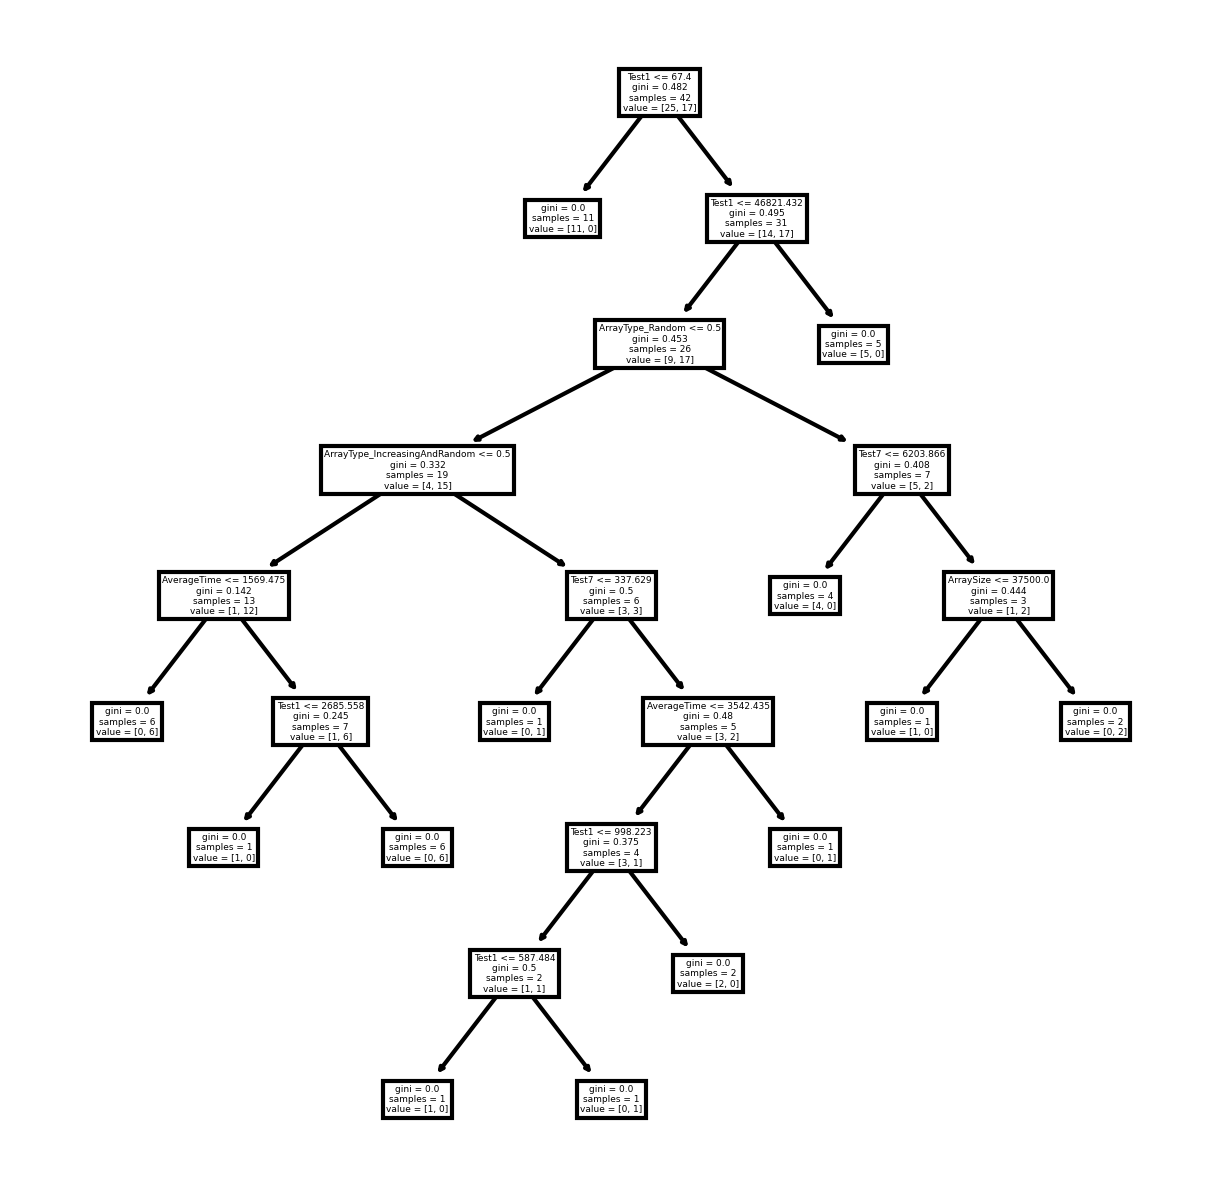

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5), dpi = 300)
plot_tree(dtree, feature_names = x.columns)
plt.show()

-------------------------------------------------------------

### k-Nearest Neighbors for Classification

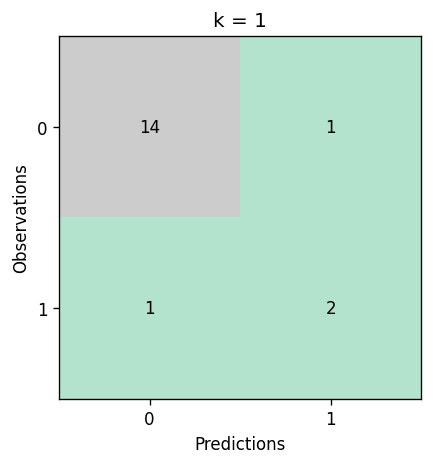

   Accuracy = 88.89%
  Precision = 66.67%
Sensitivity = 66.67%
Specificity = 93.33%


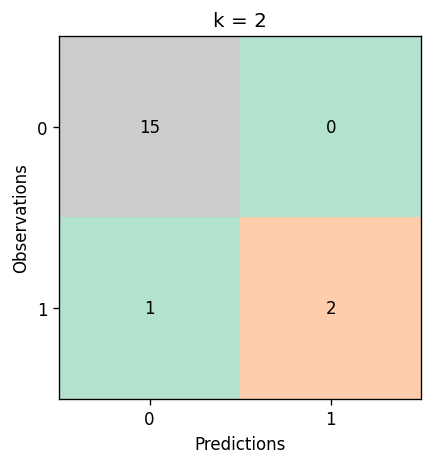

   Accuracy = 94.44%
  Precision = 100.00%
Sensitivity = 66.67%
Specificity = 100.00%


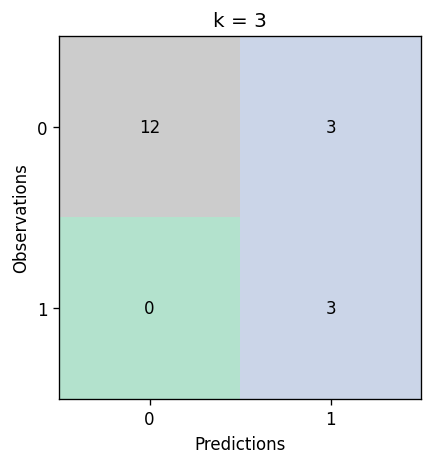

   Accuracy = 83.33%
  Precision = 50.00%
Sensitivity = 100.00%
Specificity = 80.00%


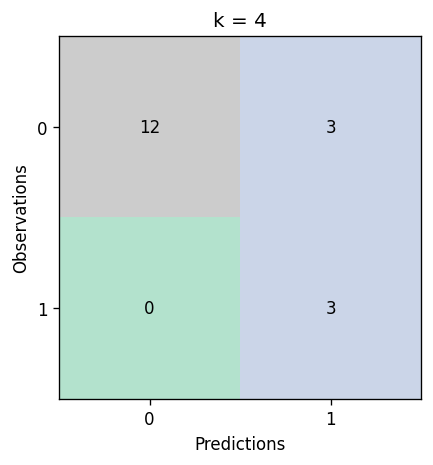

   Accuracy = 83.33%
  Precision = 50.00%
Sensitivity = 100.00%
Specificity = 80.00%


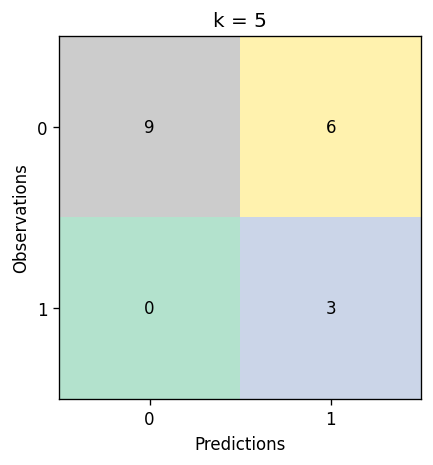

   Accuracy = 66.67%
  Precision = 33.33%
Sensitivity = 100.00%
Specificity = 60.00%


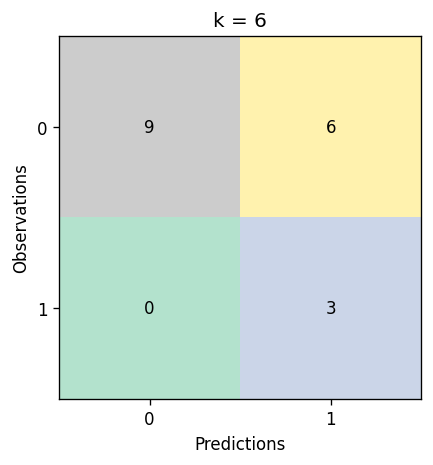

   Accuracy = 66.67%
  Precision = 33.33%
Sensitivity = 100.00%
Specificity = 60.00%


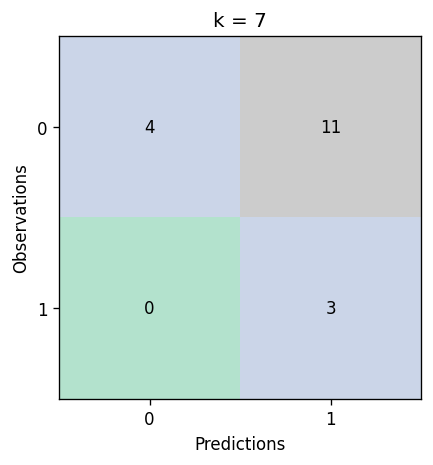

   Accuracy = 38.89%
  Precision = 21.43%
Sensitivity = 100.00%
Specificity = 26.67%


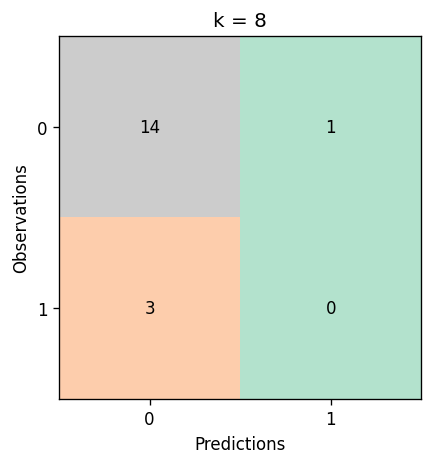

   Accuracy = 77.78%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 93.33%


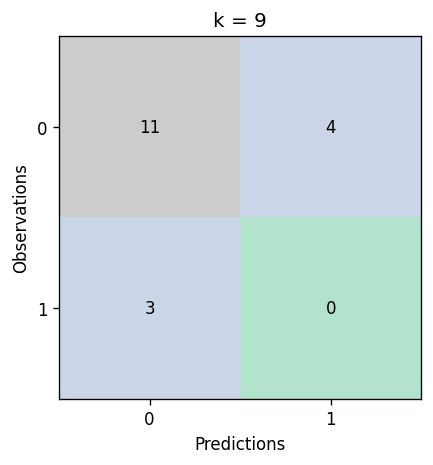

   Accuracy = 61.11%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 73.33%


In [25]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_test_preds_knn = knn.predict(x_test)
    cmatrix_knn = confusion_matrix(y_test, y_test_preds_knn)
    show_matrix(cmatrix_knn)
    plt.title("k = {}".format(k))
    plt.show()
    evaluation_metrics(cmatrix_knn)

   Accuracy = 94.44%
  Precision = 100.00%
Sensitivity = 66.67%
Specificity = 100.00%


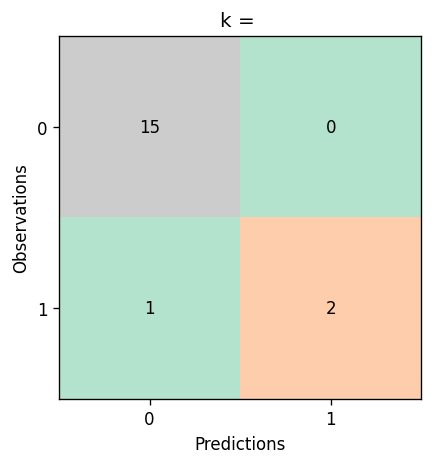

In [32]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(x_train, y_train)
y_test_preds_knn = knn.predict(x_test)
cmatrix_knn = confusion_matrix(y_test, y_test_preds_knn)
show_matrix(cmatrix_knn)
plt.title("k = ")
evaluation_metrics(cmatrix_knn)

------------------------------------------------------------------------

### Logistic regression

In [27]:
import statsmodels.formula.api as smf

In [28]:
print(*x.columns, sep = " + ")
all_features = " + ".join(map(str, x.columns))

ArraySize + Test1 + Test7 + AverageTime + ArrayType_Equal + ArrayType_Increasing + ArrayType_IncreasingAndRandom + ArrayType_Random


In [29]:
# formula: "y ~ x₀ + x₁ + ... + xₙ" (dependent ~ independents)
logit_model = smf.logit("SortType ~ {}".format(all_features), data = tests).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.607245
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                Pseudo R-squared:     0.046   
Dependent Variable:      SortType             AIC:                  90.8694 
Date:                    2022-05-20 17:15     BIC:                  109.7185
No. Observations:        60                   Log-Likelihood:       -36.435 
Df Model:                8                    LL-Null:              -38.191 
Df Residuals:            51                   LLR p-value:          0.89824 
Converged:               1.0000               Scale:                1.0000  
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------------------
Intercept                     -0.6547   0.7279 -0.8995 0.3684 -2.0813 0.7719
ArraySize                      0.0000   0.0000  0.8809 0.3784 -0.0000 0.0000
Test1                         -0.0000   0.0001 -0.7063 0.4800 -0.0002 0.0001
Test7                         -0.0001   0.0002 -0.3506 0.7259 -0.0004 0.0002
AverageTime                    0.0001   0.0002  0.4314 0.6662 -0.0003 0.0005
ArrayType_Equal               -0.3940   0.9102 -0.4329 0.6651 -2.1779 1.3899
ArrayType_Increasing          -0.3882   0.9093 -0.4270 0.6694 -2.1704 1.3939
ArrayType_IncreasingAndRandom -0.0980   0.9023 -0.1086 0.9135 -1.8665 1.6705
ArrayType_Random               0.1581   0.9353  0.1691 0.8657 -1.6751 1.9914
============================================================================

"""

Recall that the p-value for each variable (in the column P > |z|) is the probability that we would get the coefficient in the `coef` column or one with a greater magnitude, when that coefficient is really 0 (meaning that variable does not affect the dependent variable).  Make a new logistic model with only those variables with a p-value less than 0.05, and compute the summary.

In [30]:
logit_model = smf.logit("SortType ~ ArraySize + AverageTime + ArrayType_Equal + ArrayType_Increasing", data = tests).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.611893
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                 Logit             Pseudo R-squared:  0.039  
Dependent Variable:    SortType          AIC:               83.4271
Date:                  2022-05-20 17:15  BIC:               93.8989
No. Observations:      60                Log-Likelihood:    -36.714
Df Model:              4                 LL-Null:           -38.191
Df Residuals:          55                LLR p-value:       0.56546
Converged:             1.0000            Scale:             1.0000 
No. Iterations:        7.0000                                      
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------------------------------------------------------
Intercept            -0.6706   0.5091 -1.3172 0.1878 -1.6685 0.3273
ArraySize             0.0000   0.0000  0.8351 0.4037 -0.0000 0.0000
AverageTime          -0.0000   0.0000 -1.0734 0.2831 -0.0000 0.0000
ArrayType_Equal      -0.3634   0.7502 -0.4844 0.6281 -1.8337 1.1069
ArrayType_Increasing -0.3554   0.7479 -0.4751 0.6347 -1.8213 1.1105
===================================================================

"""

   Accuracy = 65.00%
  Precision = 0.00%
Sensitivity = 0.00%
Specificity = 97.50%


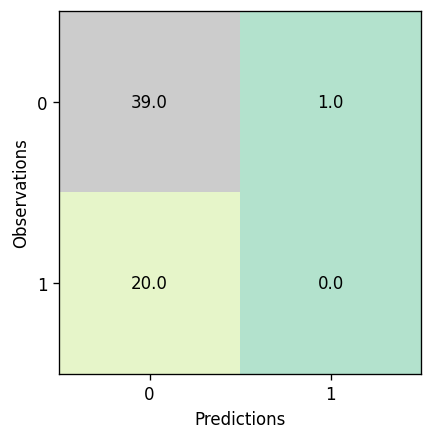

In [31]:
cmatrix_logit = logit_model.pred_table()
show_matrix(cmatrix_logit)
evaluation_metrics(cmatrix_logit)